In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install Grounding DINO 🦕

In [4]:
import os
#HOME = os.getcwd()
HOME = '/content/drive/MyDrive/Colab/Immersive/knife_detection'
print(HOME)

%cd {HOME}
!git clone -q https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/drive/MyDrive/Colab/Immersive/knife_detection
/content/drive/MyDrive/Colab/Immersive/knife_detection
/content/drive/MyDrive/Colab/Immersive/knife_detection/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
/content/drive/MyDrive/Colab/Immersive/knife_detection/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [5]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/drive/MyDrive/Colab/Immersive/knife_detection
/content/drive/MyDrive/Colab/Immersive/knife_detection/weights
/content/drive/MyDrive/Colab/Immersive/knife_detection/weights/groundingdino_swint_ogc.pth ; exist: True


## directory & variable

In [ ]:
import os
#HOME = os.getcwd()
HOME = '/content/drive/MyDrive/Colab/Immersive/knife_detection'
print(HOME)

%cd {HOME}
%cd {HOME}/GroundingDINO
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

%cd {HOME}
%cd {HOME}/weights
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

In [6]:
%cd {HOME}/GroundingDINO

import numpy as np
from PIL import Image
import groundingdino.datasets.transforms as T
from groundingdino.util.inference import load_model, load_image, predict, annotate

/content/drive/MyDrive/Colab/Immersive/knife_detection/GroundingDINO


In [7]:
model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [8]:
def inference(img, prompt, box_threshold=0.35, text_threshold=0.25):
    transform = T.Compose([
        T.RandomResize([800], max_size=1333),
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])

    image_transformed, _ = transform(Image.fromarray(img), None)

    boxes, logits, phrases = predict(
        model=model,
        image=image_transformed,
        caption=prompt,
        box_threshold=box_threshold,
        text_threshold=text_threshold
    )

    annotated_frame = annotate(image_source=img, boxes=boxes, logits=logits, phrases=phrases)

    return annotated_frame

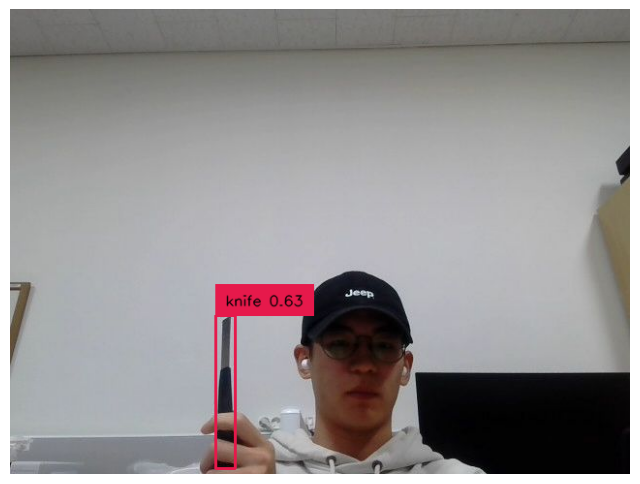

In [18]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

IMAGE_PATH = os.path.join("/content/drive/MyDrive/Colab/Immersive/knife_detection/Image", "photo.jpg")

img = cv2.imread(IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result_img = inference(img, "knife")

plt.figure(figsize=(8, 8))
plt.imshow(result_img[:, :, ::-1])
plt.axis("off")
plt.show()